This module will illustrate two ideas: Bagging and Boosting

Bagging smooths out variance by averaging many independent models. Accuracy saturates as you add more trees.

Boosting reduces bias by sequentially focusing on errors. Accuracy typically improves steadily but may eventually overfit.

Single Decision Tree Accuracy: 0.7833
Bagging with 1 trees Accuracy: 0.773
Bagging with 5 trees Accuracy: 0.813
Bagging with 10 trees Accuracy: 0.833
Bagging with 20 trees Accuracy: 0.847
Bagging with 50 trees Accuracy: 0.860
Bagging with 100 trees Accuracy: 0.857


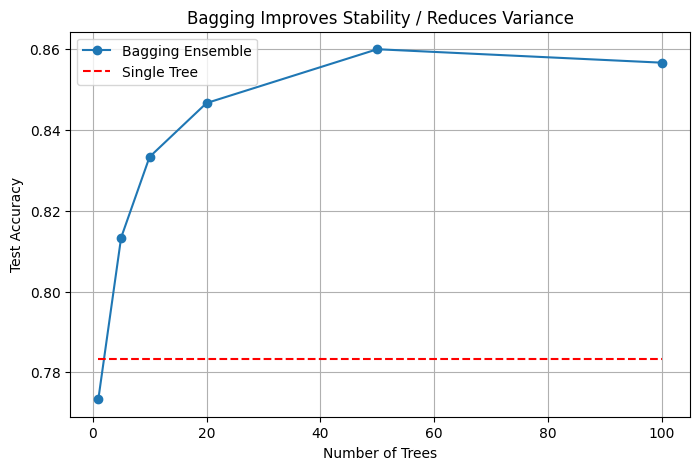

In [2]:
### Bagging

import numpy as np                                            
import matplotlib.pyplot as plt                               
from sklearn.datasets import make_classification               
from sklearn.tree import DecisionTreeClassifier                
from sklearn.ensemble import BaggingClassifier                 
from sklearn.model_selection import train_test_split           
from sklearn.metrics import accuracy_score                     

# Generate a synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Baseline: Single Decision Tree
base_tree = DecisionTreeClassifier(max_depth=5, random_state=42) # Limit depth to avoid overfitting
base_tree.fit(X_train, y_train)
y_pred_base = base_tree.predict(X_test)
acc_base = accuracy_score(y_test, y_pred_base)
print(f"Single Decision Tree Accuracy: {acc_base:.4f}")

# Bagging: Vary number of trees and record accuracy
n_estimators_list = [1, 5, 10, 20, 50, 100]
bagging_acc = []

for n in n_estimators_list:
    bag = BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=5),
        n_estimators=n,
        bootstrap=True,
        random_state=42
    )
    bag.fit(X_train, y_train)
    y_pred = bag.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    bagging_acc.append(acc)
    print(f"Bagging with {n} trees Accuracy: {acc:.3f}")

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, bagging_acc, marker='o', label='Bagging Ensemble')
plt.hlines(acc_base, n_estimators_list[0], n_estimators_list[-1],
           colors='r', linestyles='--', label='Single Tree')
plt.xlabel('Number of Trees')
plt.ylabel('Test Accuracy')
plt.title('Bagging Improves Stability / Reduces Variance')
plt.legend()
plt.grid(True)
plt.show()

Single Decision Stump Accuracy: 0.6800
AdaBoost with 1 estimators Accuracy: 0.680
AdaBoost with 5 estimators Accuracy: 0.707
AdaBoost with 10 estimators Accuracy: 0.793
AdaBoost with 20 estimators Accuracy: 0.797
AdaBoost with 50 estimators Accuracy: 0.837
AdaBoost with 100 estimators Accuracy: 0.833


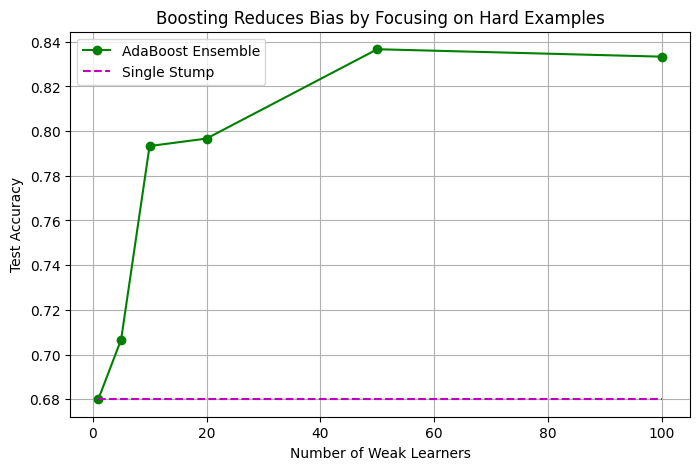

In [4]:
from sklearn.ensemble import AdaBoostClassifier

# Baseline: single decision stump (max_depth=1)
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train, y_train)
y_pred_stump = stump.predict(X_test)
acc_stump = accuracy_score(y_test, y_pred_stump)
print(f"Single Decision Stump Accuracy: {acc_stump:.4f}")
# adaBoost: Vary number of estimators and record accuracy
boost_acc = []
for n in n_estimators_list:
    ada = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=n,
        random_state=42
    )
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    boost_acc.append(acc)
    print(f"AdaBoost with {n} estimators Accuracy: {acc:.3f}")

# 3. Plot accuracy vs. number of estimators
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, boost_acc, marker='o', color='g', label='AdaBoost Ensemble')
plt.hlines(acc_stump, n_estimators_list[0], n_estimators_list[-1],
           colors='m', linestyles='--', label='Single Stump')
plt.xlabel('Number of Weak Learners')
plt.ylabel('Test Accuracy')
plt.title('Boosting Reduces Bias by Focusing on Hard Examples')
plt.legend()
plt.grid(True)
plt.show()

Conclusion:

Bagging plot:
 - Single tree baseline sits at about 78%
 - As you increase the number of trees in bagging ensemble, the test accuracy increase
 - Bagging reduces variance

Boosting plot:
 - Single decision stump sits at about 68%
 - Adding AdaBoost boosts the accuracy to 80% but plateau / dip later, indicate possible overfitting
 - It reduce bias by focusing each new learner on the mistakes of the previous ones